![](https://image-1256668828.cos.ap-shanghai.myqcloud.com/data_01.png)

## 本周摘要

- 删除特定行
- 布尔值索引
- 可视化初探
- 项目三预览

[讲师站点（ 内含班级主页 ）](https://www.zhang-ran.com)

>- [ ] 开始录屏

`关于删除特定行`

In [73]:
import pandas as pd

df = pd.DataFrame()

df['age'] = [-1, 1, 8, 3, 4, 5]
df

,age
0,-1
1,1
2,8
3,3
4,4
5,5


In [74]:
df.index.tolist()

[0, 1, 2, 3, 4, 5]

In [75]:
num_index = df[df['age']==8].index.tolist()
num_index

[2]

In [76]:
df = df.drop(num_index)
df

,age
0,-1
1,1
3,3
4,4
5,5


`NumPy 向量运算`

![](https://image-1256668828.cos.ap-shanghai.myqcloud.com/NumPy%E5%90%91%E9%87%8F%E8%BF%90%E7%AE%97.png)

In [77]:
import numpy as np

In [78]:
x = np.array([1, 2, 3])

x += 5
x

array([6, 7, 8])

In [79]:
arr = np.array([1, 2, 3, 5, 8])

In [80]:
a = arr[0]
a

1

In [81]:
arr_slice = arr[2:]
arr_slice

array([3, 5, 8])

In [82]:
# 布尔值索引

names = np.array(['Bob','Joe'])
scores = np.array([64,85])

In [83]:
names == 'Bob'

array([ True, False])

In [84]:
s = scores[names == 'Bob']

In [85]:
int(s)

64

## `可视化拓展`

In [86]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

- `Alt/Option + Tab 或者 Shift + Tab 查询属性`

- `注释快捷键`

In [87]:
# pd.read_csv

In [88]:
df = pd.read_csv('pro_df.csv')
df.head()

,Trip_Duration,Birth_Year,hour,month,day,User_Type,Gender
0,321,1992,15,6,5,Subscriber,Male
1,1610,1992,18,5,4,Subscriber,Female
2,416,1981,8,1,3,Subscriber,Male
3,350,1986,13,3,1,Subscriber,Male
4,534,1975,14,1,2,Subscriber,Male


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238948 entries, 0 to 238947
Data columns (total 7 columns):
Trip_Duration    238948 non-null int64
Birth_Year       238948 non-null int64
hour             238948 non-null int64
month            238948 non-null int64
day              238948 non-null int64
User_Type        238948 non-null object
Gender           238948 non-null object
dtypes: int64(5), object(2)
memory usage: 12.8+ MB


In [90]:
df.User_Type = df.User_Type.astype('category')
df.Gender = df.Gender.astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238948 entries, 0 to 238947
Data columns (total 7 columns):
Trip_Duration    238948 non-null int64
Birth_Year       238948 non-null int64
hour             238948 non-null int64
month            238948 non-null int64
day              238948 non-null int64
User_Type        238948 non-null category
Gender           238948 non-null category
dtypes: category(2), int64(5)
memory usage: 9.6 MB


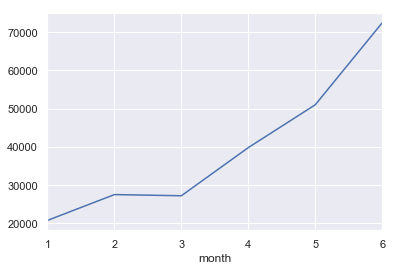

In [91]:
# 每月的数量变化
# 或者试试 hour

test001 = df.groupby('month')['month'].count()

test001.plot(kind = 'line');

In [92]:
# 输出男女每月的人数

df_groupby = df.groupby(['Gender','month'])['Gender','month'].count()
df_groupby.Gender

Gender  month
Female  1         4059
        2         6119
        3         5737
        4         9585
        5        12750
        6        19508
Male    1        16745
        2        21437
        3        21514
        4        30250
        5        38284
        6        52960
Name: Gender, dtype: int64

In [107]:
# 设定灰色背景

# sns.set(style="darkgrid")

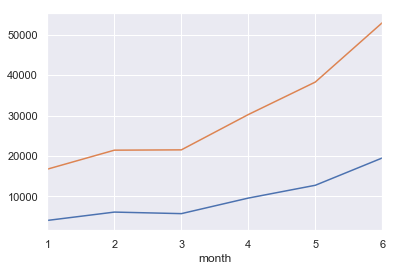

In [93]:
# 选择数据进行线条绘制

df_groupby.Gender.Female.plot(kind = 'line')

df_groupby.Gender.Male.plot(kind = 'line')

plt.show();

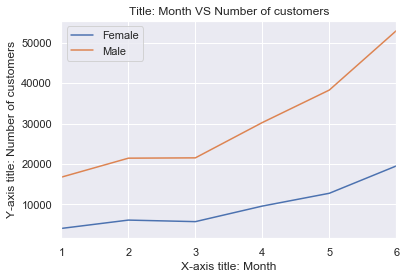

In [94]:
# 练习增加 X轴 Y轴 标题 和 标签

groupby.Gender.Female.plot(kind = 'line')
groupby.Gender.Male.plot(kind = 'line')

# X轴
plt.xlabel('X-axis title: Month')

# Y轴
plt.ylabel('Y-axis title: Number of customers')

# Title
plt.title('Title: Month VS Number of customers')

# 标签
plt.legend(labels = ['Female', 'Male'], loc = 0)

plt.show();

In [95]:
# 求出两个月之间的差值

diffs = groupby.Gender.diff()
diffs

Gender  month
Female  1            NaN
        2         2060.0
        3         -382.0
        4         3848.0
        5         3165.0
        6         6758.0
Male    1        -2763.0
        2         4692.0
        3           77.0
        4         8736.0
        5         8034.0
        6        14676.0
Name: Gender, dtype: float64

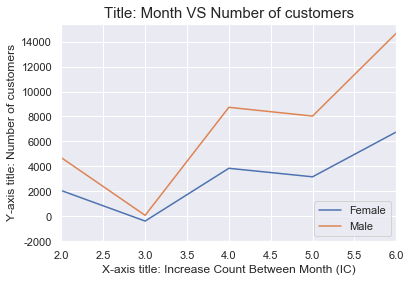

In [96]:
# 练习增加 X轴 Y轴 标题 和 标签

diffs.Female[1:].plot(kind = 'line')
diffs.Male[1:].plot(kind = 'line')

# X轴
plt.xlabel('X-axis title: Increase Count Between Month (IC)', fontsize=12)

# Y轴
plt.ylabel('Y-axis title: Number of customers', fontsize=12)

# Title
plt.title('Title: Month VS Number of customers', fontsize=15)

# 标签
plt.legend(labels = ['Female', 'Male'], loc = 4) # loc 图例位置

# 改变 x 和 y的间隔
# plt.xticks(range(2,7), ["IC-{}".format(i) for i in range(1,6)])

plt.yticks(range(-2000, 16000, 2000))

# 增加网格
plt.grid(b = True, axis = 'y') # axis 网格方向

plt.show();

In [97]:
# 求出每个group的平均骑行时间

groupby2 = df.groupby('User_Type')['Trip_Duration'].mean()
groupby2

User_Type
Customer      807.637363
Dependent     311.000000
Subscriber    699.351195
Name: Trip_Duration, dtype: float64

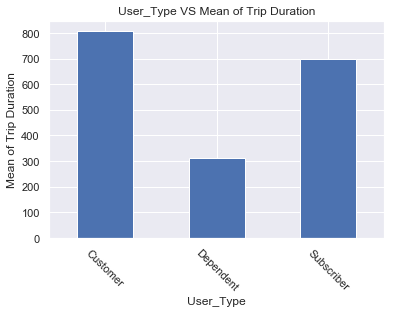

In [98]:
# 输出用户类型的平均骑行时间的bar图

groupby2.plot(kind = 'bar')  # color = 'lightgrey'

plt.xticks(rotation = -45) # rotation 旋转角度
plt.ylabel('Mean of Trip Duration')
plt.title("User_Type VS Mean of Trip Duration")

plt.grid(b = True, axis = 'y')
# plt.grid(b = True, axis = 'x')

plt.show();

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238948 entries, 0 to 238947
Data columns (total 7 columns):
Trip_Duration    238948 non-null int64
Birth_Year       238948 non-null int64
hour             238948 non-null int64
month            238948 non-null int64
day              238948 non-null int64
User_Type        238948 non-null category
Gender           238948 non-null category
dtypes: category(2), int64(5)
memory usage: 9.6 MB


In [103]:
df_scatter = df.drop(['User_Type', 'Gender'], axis=1)

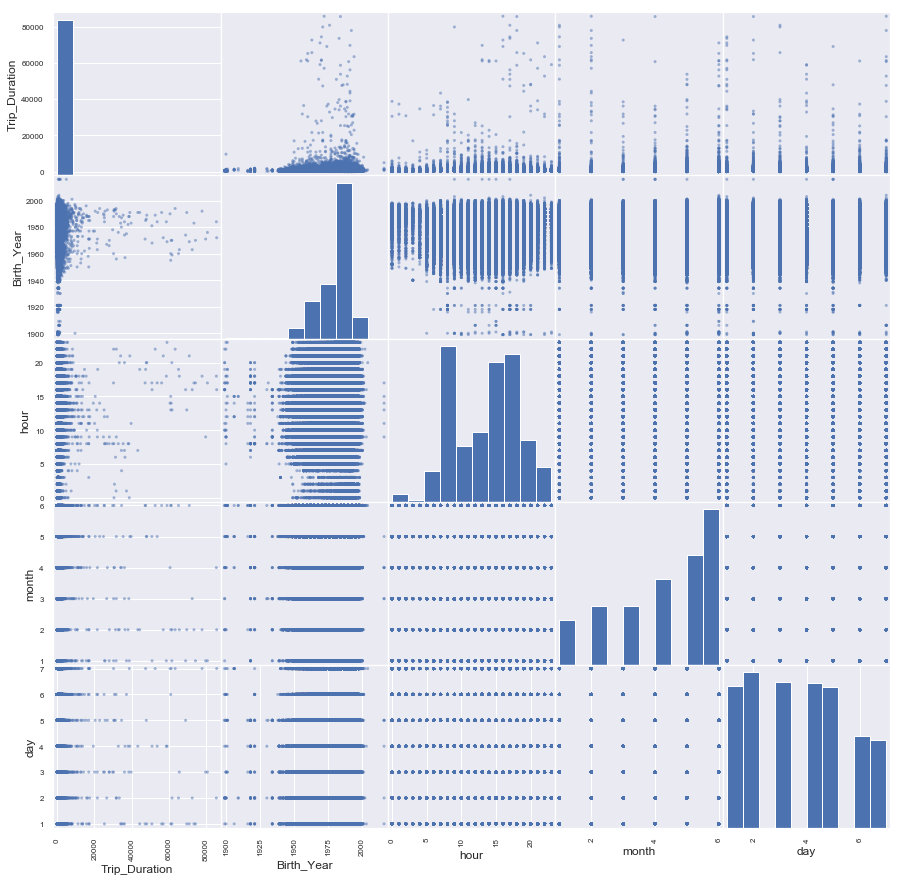

In [108]:
# plotting a metrix of several columns

pd.plotting.scatter_matrix(df_scatter, figsize = (15,15))
plt.show();

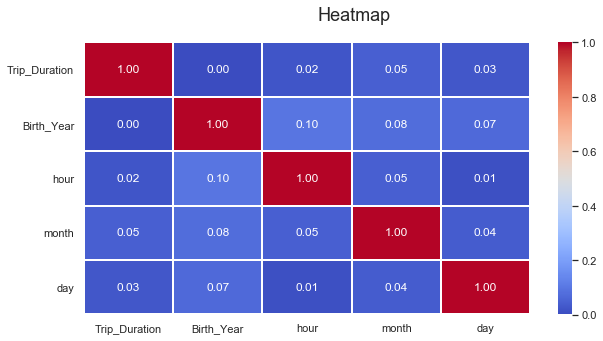

In [105]:
# 输出数据集热点图

fig, ax = plt.subplots(figsize=(10, 5)) 
corr = df.iloc[:,:5].corr()
heatmap = sns.heatmap(corr, annot=True, ax=ax, cmap="coolwarm", fmt='.2f', linewidths=1) 
fig.suptitle('Heatmap', fontsize=18)

plt.show();

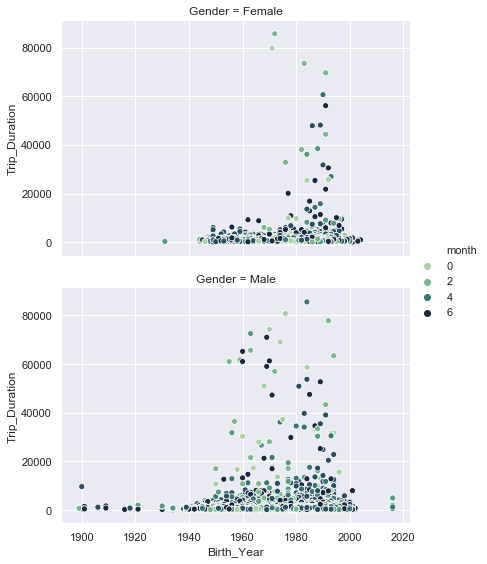

In [110]:
# 输出年龄和骑行时间的关系
# https://seaborn.pydata.org/generated/seaborn.relplot.html

# x, y : names of variables in data
# aspect : Aspect ratio of each facet, so that aspect * height gives the width of each facet in inches
# col_wrap : “Wrap” the column variable at this width, so that the column facets span multiple rows
# hue : name in data, optional
# palette :Colors to use for the different levels of the hue variable.

sns.relplot(x = 'Birth_Year', y = 'Trip_Duration', data = df,
            
            # figsize, width = aspect * height
            height = 4,
            aspect = 1.5,
            col_wrap = 1,
            
            # change color
            col = 'Gender',
            hue = 'month',
            palette="ch:r=-.5,l=.75")

plt.show();

# 项目预览

> 空白项目

In [111]:
df = pd.read_csv('tmdb-movies.csv')
df.sample(3) # tail head

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
8546,18220,tt0114151,0.488458,0,0,Poison Ivy II: Lily,Alyssa Milano|Johnathon Schaech|Xander Berkele...,NaN,Anne Goursaud,Passion. Seduction. Betrayal. Lily wanted to b...,...,A young and naive college art student becomes ...,106,Drama|Thriller|Romance,New Line Cinema|CineTel Pictures|MG Entertainment,1/16/96,15,4.3,1996,0.000000e+00,0.000000e+00
8321,12395,tt0105585,0.344615,0,0,Thunderheart,Val Kilmer|Sam Shepard|Graham Greene|Fred Ward...,NaN,Michael Apted,Two men from different worlds. Two cops after ...,...,An FBI man with Sioux background is sent to a ...,119,Action|Adventure|Crime|Mystery|Thriller,TriStar Pictures,4/3/92,27,5.6,1992,0.000000e+00,0.000000e+00
1676,25132,tt1100119,0.347707,40000000,28972508,Shorts,Jimmy Bennett|Kat Dennings|Jolie Vanier|Willia...,NaN,Robert Rodriguez,Not So TALL Tales From The Director Of 'Spy Kids',...,"A young boy's discovery of a colorful, wish-gr...",89,Comedy|Family,Warner Bros. Pictures,8/21/09,20,4.8,2009,4.065602e+07,2.944767e+07


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

>- 此数据集中变量的意义

>| 变量名 | 含义 | 变量名 | 含义 |
| ------ | ------ | ------ | ------ |
| id | 序号 | keywords | 电影关键词 |
| imdb_id | imdb编码 | overview | 概要 |
| polpularity | 受欢迎程度 | runtime | 电影时长 |
| budget | 预算 | genres | 电影类型 |
| revenue | 收入 | production_companies | 制作公司 |
| original_title | 片名 | release_date | 发行日期 |
| cast | 演员表 | vote_count | 评价次数 |
| homepage | 电影网址 | vote_average | 平均评分 |
| director | 导演 | release_year | 发布年份 |
| tageline | 宣传词 | budget_adj | 预算（调整后） |
| revenue_adj | 收入（调整后） |


In [113]:
df.duplicated().sum()

1

In [114]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [115]:
# AttributeError: 'float' object has no attribute 'split'

'''
for x in df['genres']: 
    genres_set.update(x.split('|')) 
genres_set
'''

genres_set = set()

# print('AttributeError: float object has no attribute split')

In [116]:
df.genres = df.genres.astype(str)

genres_set = set()
for x in df['genres']: 
    genres_set.update(x.split('|')) 
    
genres_set

{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western',
 'nan'}

In [117]:
genres_set.remove('nan')

In [118]:
genres_set

{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western'}

>- [pd.str.contains文档](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html)

In [119]:
for genres in genres_set:
    df[genres] = df['genres'].str.contains(genres)
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,Fantasy,Thriller,Western,Music,History,Comedy,Romance,Science Fiction,Adventure,Family
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,False,True,False,False,False,False,False,True,True,False
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,False,True,False,False,False,False,False,True,True,False
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,False,True,False,False,False,False,False,True,True,False
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,True,False,False,False,False,False,False,True,True,False
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,False,True,False,False,False,False,False,False,False,False


In [120]:
for genres in genres_set:
    df[genres] = df['genres'].str.contains(genres).apply(lambda x:1 if x else 0)
df.head(1) 

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,Fantasy,Thriller,Western,Music,History,Comedy,Romance,Science Fiction,Adventure,Family
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,0,1,0,0,0,0,0,1,1,0


In [121]:
df.drop('genres', axis = 1, inplace = True)

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 40 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
homepage                2936 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              10865 non-null float64
revenue_adj             

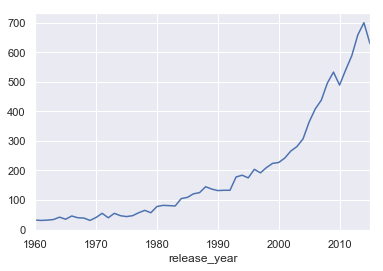

In [123]:
nums = df.groupby('release_year')['release_year'].count() 

year = df['release_year']

nums.plot(x = year, y =nums)

plt.show();

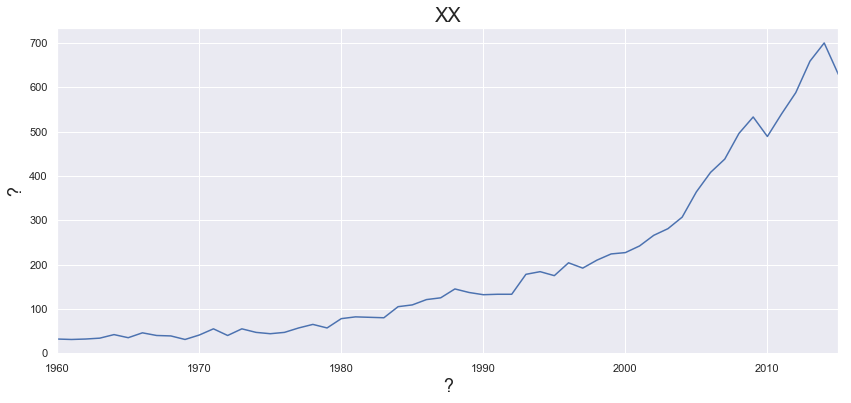

In [124]:
nums = df.groupby('release_year')['release_year'].count() 
year = df['release_year']

fig = plt.figure(figsize=(14,6)) 

nums.plot(x = year, y =nums)

plt.title('XX', fontsize = 20)

plt.ylabel('?', fontsize =18) 
plt.xlabel('?', fontsize =18) 

# plt.xticks(range(1980, 2018, 10))

plt.show();

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 40 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
homepage                2936 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              10865 non-null float64
revenue_adj             

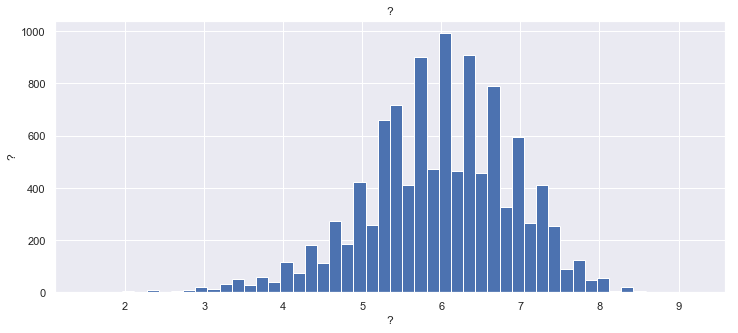

In [126]:
df['vote_average'].plot(kind = 'hist',bins = 50,title = '?',figsize = (12,5))

plt.ylabel('?')
plt.xlabel('?')
plt.show();

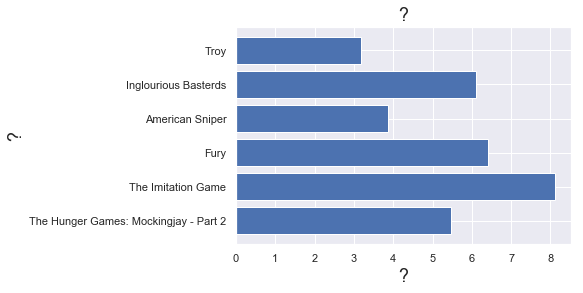

In [127]:
df_war = df[df['War'] == 1]
df_war_popularity = df_war[df_war.popularity > df_war.popularity.quantile(.98)]

x = df_war_popularity.original_title
y = df_war_popularity['popularity']

plt.barh(x, y)

plt.title('?', fontsize = 18)
plt.ylabel('?', fontsize =18) 
plt.xlabel('?', fontsize =18) 

plt.show();

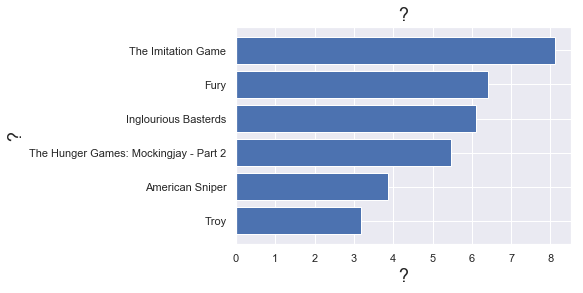

In [128]:
df_war_popularity = df_war_popularity.sort_values(by = 'popularity')

x = df_war_popularity.original_title
y = df_war_popularity['popularity']

plt.barh(x, y)

plt.title('?', fontsize = 18)
plt.ylabel('?', fontsize =18) 
plt.xlabel('?', fontsize =18)

plt.show();